In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split

# **read file**

In [7]:
df = pd.read_csv('/content/drive/MyDrive/AI /Homework1(TERM5)/Pre-processed_data.csv')
df

,client_id,loan_type,loan_amount,repaid,loan_id,rate
0,0.750,0.666667,0.909867,0.0,0.118063,0.216162
1,0.750,0.333333,0.640785,0.0,0.491927,0.125253
2,0.750,0.666667,0.844782,1.0,0.494955,0.067677
3,0.750,0.000000,0.829795,1.0,0.296165,0.124242
4,0.750,0.333333,0.936026,1.0,0.709384,0.315152
...,...,...,...,...,...,...
435,0.125,1.000000,0.860672,0.0,0.161958,0.247475
436,0.125,0.333333,0.081113,1.0,0.120585,0.531313
437,0.125,1.000000,0.608521,0.0,0.073158,0.569697
438,0.125,0.666667,0.252429,0.0,0.163471,0.453535


<Axes: >

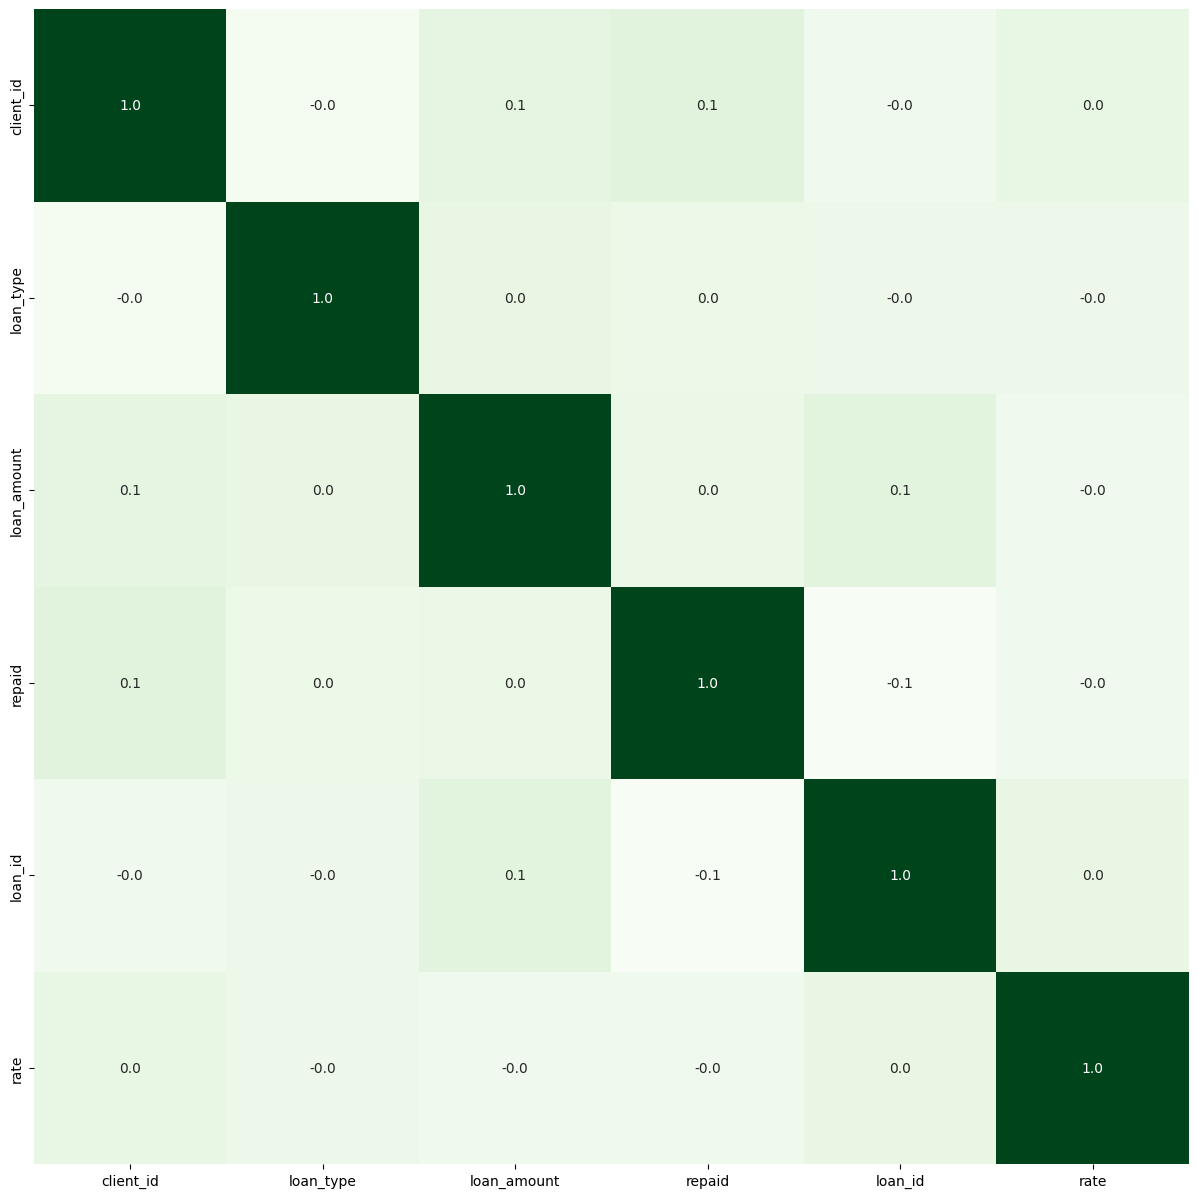

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),cbar=False,square=True,fmt='.1f', annot=True,annot_kws={'size':10},cmap='Greens')

# **single variable**

In [58]:
X = df[['loan_id']]
y = df[['loan_amount']]
# # Add column one
X = np.c_[np.ones((X.shape[0], 1)), X]
#split data

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(88, 2)
(352, 2)
(88, 1)
(352, 1)


In [28]:
#create regression model
model = LinearRegression()

#train model
model.fit(X_train, y_train)
print(f"model conf : {model.coef_}")
print(f"model intercept : {model.intercept_}")

y_pred = model.predict(X_test)


model conf : [[0.         0.13607163]]
model intercept : [0.43698051]


In [72]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mse : {mse}')
print(f'r2 score : {r2}') #beacuse not correlation

mse : 0.0859331862919157
r2 score : -0.0064178691417915434


In [73]:
new_X = np.array([0.39,0.54,0.98,0.25,0.84,0.24]).reshape(-1, 1)
new_X = np.c_[np.ones((new_X.shape[0], 1)), new_X]
new_y_pred = model.predict(new_X)

# **multi variable**

In [80]:
X = df[['loan_type','loan_id']]
y = df[['loan_amount']]

# Create regression model
model = LinearRegression()

# Training the model
model.fit(X, y)

# Using the model to predict the test data
y_pred = model.predict(X)

#(MSE)
mse = mean_squared_error(y, y_pred)

#R2
r2 = r2_score(y, y_pred)

# Show result
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")
print(f"model intercept : {model.intercept_}")
print(f"model conf : {model.coef_}")


Mean Squared Error : 0.08336312260120339
R-squared : 0.006483038924852691
model intercept : [0.46505832]
model conf : [[0.03015769 0.07019769]]


In [81]:
X = df[['loan_type','loan_id','rate']]
y = df[['loan_amount']]

# Create regression model
model = LinearRegression()

# Training the model
model.fit(X, y)

# Using the model to predict the test data
y_pred = model.predict(X)

#(MSE)
mse = mean_squared_error(y, y_pred)

#R2
r2 = r2_score(y, y_pred)

# Show result
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")
print(f"model intercept : {model.intercept_}")
print(f"model conf : {model.coef_}")


Mean Squared Error : 0.08330514474991595
R-squared : 0.007174015664007882
model intercept : [0.4749481]
model conf : [[ 0.03009655  0.0712942  -0.03272817]]
